In [1]:
import sys
import os

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

# Diffusion, RD, and ACP

k_ij: [0.52347826 0.93043377 0.62255182 0.17436676 0.17000388 0.8852311
 0.75176167 0.65687361 0.40505076 0.72808937]
gamma: [0.43857969 0.4093225  0.45915476 0.4819773  0.61253089 0.55809636
 0.5576083  0.55276217 0.57569436 0.6488576 ]
eta:[1.05469223 1.07651267 1.45781785 1.20362249 1.4505618  1.2350686
 1.20779405 1.41378246 1.42426752 1.13956318]


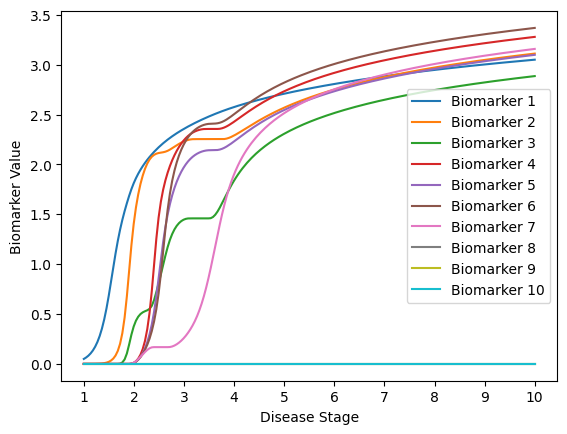

In [2]:
n_biomarker_stages = 10
model_type = 'acp'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [3]:
# ACP No Prior
analyzer = DiseaseProgressionAnalyzer(patient_samples)

import numpy as np
if np.any(np.isinf(analyzer.X)):
    print("There is a Nan")

In [4]:
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

/home/dsemchin/miniconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/dsemchin/miniconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
  6%|▌         | 578/10000 [00:00<00:01, 5778.71it/s]

Iteration 0: a=2, b=4, order=[3 2 0 8 7 1 4 5 9 6], old_loglike=nan, new_loglike=nan
Iteration 1000: a=7, b=2, order=[3 2 0 8 7 1 4 5 9 6], old_loglike=nan, new_loglike=nan


 29%|██▉       | 2876/10000 [00:00<00:01, 5722.32it/s]

Iteration 2000: a=7, b=6, order=[3 2 0 8 7 1 4 5 9 6], old_loglike=nan, new_loglike=nan
Iteration 3000: a=7, b=2, order=[3 2 0 8 7 1 4 5 9 6], old_loglike=nan, new_loglike=nan


 46%|████▌     | 4604/10000 [00:00<00:00, 5746.51it/s]

Iteration 4000: a=7, b=5, order=[3 2 0 8 7 1 4 5 9 6], old_loglike=nan, new_loglike=nan
Iteration 5000: a=5, b=2, order=[3 2 0 8 7 1 4 5 9 6], old_loglike=nan, new_loglike=nan


 69%|██████▉   | 6920/10000 [00:01<00:00, 5770.44it/s]

Iteration 6000: a=3, b=1, order=[3 2 0 8 7 1 4 5 9 6], old_loglike=nan, new_loglike=nan
Iteration 7000: a=6, b=3, order=[3 2 0 8 7 1 4 5 9 6], old_loglike=nan, new_loglike=nan


 87%|████████▋ | 8655/10000 [00:01<00:00, 5740.69it/s]

Iteration 8000: a=9, b=6, order=[3 2 0 8 7 1 4 5 9 6], old_loglike=nan, new_loglike=nan
Iteration 9000: a=5, b=9, order=[3 2 0 8 7 1 4 5 9 6], old_loglike=nan, new_loglike=nan


100%|██████████| 10000/10000 [00:01<00:00, 5735.84it/s]


Greedy Ascent Result: [3 2 0 8 7 1 4 5 9 6]


  0%|          | 571/500000 [00:00<01:27, 5701.70it/s]

Iteration 0: a=2, b=4, order=[3 2 7 8 0 1 4 5 9 6], old_loglike=nan, new_loglike=nan, p=nan


 20%|██        | 100924/500000 [00:18<01:15, 5291.21it/s]

Iteration 100000: a=4, b=7, order=[3 2 0 8 5 1 4 7 9 6], old_loglike=nan, new_loglike=nan, p=nan


 40%|████      | 201035/500000 [00:37<00:56, 5297.34it/s]

Iteration 200000: a=5, b=9, order=[3 2 0 8 7 6 4 5 9 1], old_loglike=nan, new_loglike=nan, p=nan


 45%|████▍     | 224622/500000 [00:42<00:51, 5311.96it/s]


KeyboardInterrupt: 

In [4]:
# ACP w/ Prior
analyzer_prior = DiseaseProgressionAnalyzer(patient_samples)
analyzer_prior.set_prior(prior = prior)
likelihood_matrix_prior = analyzer.run_analysis('ebm')
analyzer_prior.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:01<00:00, 6032.98it/s]


Greedy Ascent Result: [7 5 2 0 9 8 6 4 3 1]


  0%|          | 594/500000 [00:00<01:24, 5938.79it/s]

Iteration 0: a=2, b=4, order=[7 5 9 0 2 8 6 4 3 1], old_loglike=nan, new_loglike=nan, p=nan


 20%|██        | 100718/500000 [00:16<01:06, 5968.87it/s]

Iteration 100000: a=4, b=7, order=[7 5 2 0 4 8 6 9 3 1], old_loglike=nan, new_loglike=nan, p=nan


 40%|████      | 200941/500000 [00:33<00:50, 5969.55it/s]

Iteration 200000: a=5, b=9, order=[7 5 2 0 9 1 6 4 3 8], old_loglike=nan, new_loglike=nan, p=nan


 60%|██████    | 301136/500000 [00:50<00:33, 5976.91it/s]

Iteration 300000: a=2, b=5, order=[7 5 8 0 9 2 6 4 3 1], old_loglike=nan, new_loglike=nan, p=nan


 80%|████████  | 401115/500000 [01:07<00:16, 5940.62it/s]

Iteration 400000: a=2, b=1, order=[7 2 5 0 9 8 6 4 3 1], old_loglike=nan, new_loglike=nan, p=nan


100%|██████████| 500000/500000 [01:23<00:00, 5969.51it/s]


ValueError: attempt to get argmax of an empty sequence

## DIFFUSION MODEL

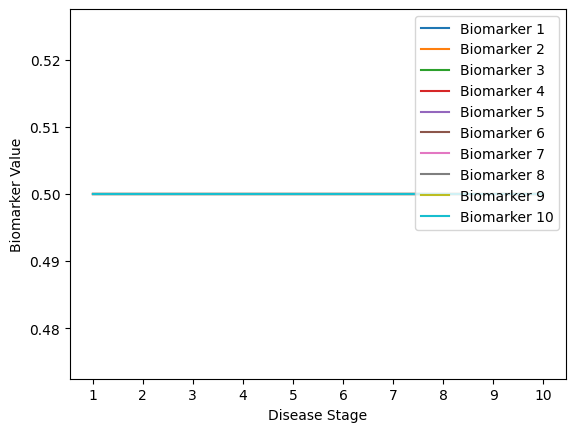

In [2]:
n_biomarker_stages = 10
model_type = 'diffusion'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [ ]:
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = prior)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

## REACTION DIFFUSION

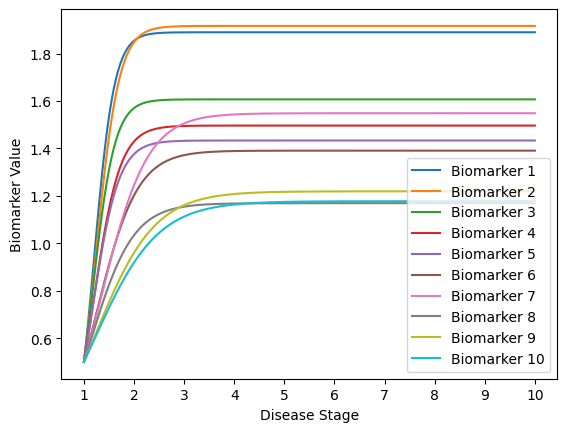

In [9]:
n_biomarker_stages = 10
model_type = 'reaction_diffusion'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [4]:
# RD No Prior
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

/home/dsemchin/miniconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/dsemchin/miniconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
100%|██████████| 10000/10000 [00:01<00:00, 5908.12it/s]


Greedy Ascent Result: [1 5 9 7 3 6 2 0 8 4]


100%|██████████| 500000/500000 [01:25<00:00, 5830.09it/s]


ValueError: attempt to get argmax of an empty sequence

In [5]:
# RD w/ Prior
analyzer_prior = DiseaseProgressionAnalyzer(patient_samples)
analyzer_prior.set_prior(prior = prior)
likelihood_matrix_prior = analyzer.run_analysis('ebm')
analyzer_prior.ebm_analyzer.summary()

/home/dsemchin/miniconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/dsemchin/miniconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
100%|██████████| 10000/10000 [00:01<00:00, 5549.00it/s]


Greedy Ascent Result: [7 6 1 5 4 3 2 8 9 0]


100%|██████████| 500000/500000 [01:30<00:00, 5499.87it/s]


ValueError: attempt to get argmax of an empty sequence

## ODE demo

self.time_points length: 203, self.model_values[0] length: 203
self.time_points length: 203, self.model_values[1] length: 203
self.time_points length: 203, self.model_values[2] length: 203
self.time_points length: 203, self.model_values[3] length: 203
self.time_points length: 203, self.model_values[4] length: 203
self.time_points length: 203, self.model_values[5] length: 203
self.time_points length: 203, self.model_values[6] length: 203
self.time_points length: 203, self.model_values[7] length: 203
self.time_points length: 203, self.model_values[8] length: 203
self.time_points length: 203, self.model_values[9] length: 203


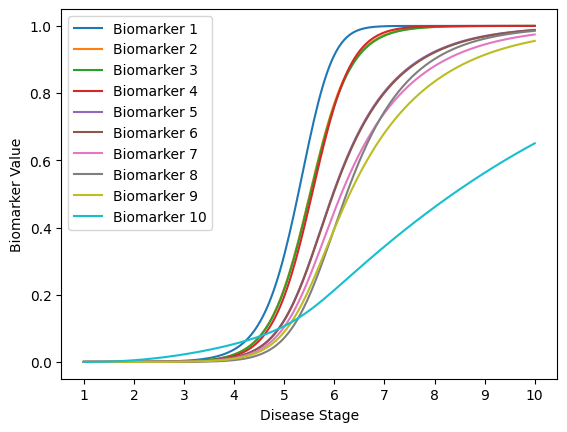

In [9]:
# TODO: add param grid options
# model parameters
n_biomarker_stages = 10
model_type = 'logistic'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [10]:
# Logistic No Priors
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:02<00:00, 3676.23it/s]


Greedy Ascent Result: [0 1 2 3 5 8 6 4 7 9]


  0%|          | 357/500000 [00:00<02:20, 3563.33it/s]

Iteration 0: a=2, b=4, order=[0 1 5 3 2 8 6 4 7 9], old_loglike=-13727.79680838922, new_loglike=-13788.20840548188, p=5.8019868438559024e-27


 20%|██        | 100551/500000 [00:27<01:49, 3639.52it/s]

Iteration 100000: a=4, b=7, order=[0 1 2 3 4 8 6 5 7 9], old_loglike=-13727.79680838922, new_loglike=-13763.622622762794, p=2.760873497693682e-16


 40%|████      | 200428/500000 [00:55<01:22, 3651.71it/s]

Iteration 200000: a=5, b=9, order=[0 1 2 3 5 9 6 4 7 8], old_loglike=-13727.79680838922, new_loglike=-16653.06715112763, p=0.0


 60%|██████    | 300498/500000 [01:22<00:57, 3487.96it/s]

Iteration 300000: a=2, b=5, order=[0 1 8 3 5 2 6 4 7 9], old_loglike=-13727.79680838922, new_loglike=-13824.640631537564, p=8.734981716029253e-43


 80%|████████  | 400499/500000 [01:51<00:28, 3485.20it/s]

Iteration 400000: a=2, b=1, order=[0 2 1 3 5 8 6 4 7 9], old_loglike=-13727.79680838922, new_loglike=-13744.087171121473, p=8.417543263075894e-08


100%|██████████| 500000/500000 [02:19<00:00, 3588.51it/s]

Best Order: [0 1 2 3 5 8 6 4 7 9]
Spearman's Rho: None
Kendall's Tau: 0.7777777777777777


In [12]:
analyzer_prior = DiseaseProgressionAnalyzer(patient_samples)
analyzer_prior.set_prior(prior = prior)
likelihood_matrix_prior = analyzer.run_analysis('ebm')
analyzer_prior.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:02<00:00, 3558.14it/s]


Greedy Ascent Result: [0 1 2 3 8 6 5 4 7 9]


  0%|          | 349/500000 [00:00<02:23, 3479.97it/s]

Iteration 0: a=2, b=4, order=[0 1 8 3 2 6 5 4 7 9], old_loglike=-13726.832135821058, new_loglike=-13797.515885008701, p=2.006493548004214e-31


 20%|██        | 100539/500000 [00:28<01:53, 3513.67it/s]

Iteration 100000: a=4, b=7, order=[0 1 2 3 4 6 5 8 7 9], old_loglike=-13726.832135821058, new_loglike=-13728.262168200887, p=0.23930117358726205


 40%|████      | 200417/500000 [00:56<01:24, 3549.04it/s]

Iteration 200000: a=5, b=9, order=[0 1 2 3 8 9 5 4 7 6], old_loglike=-13726.832135821058, new_loglike=-17197.830539718183, p=0.0


 60%|██████    | 300680/500000 [01:24<00:56, 3537.59it/s]

Iteration 300000: a=2, b=5, order=[0 1 6 3 8 2 5 4 7 9], old_loglike=-13726.832135821058, new_loglike=-13829.497364771833, p=2.58855611048089e-45


 80%|████████  | 400461/500000 [01:53<00:28, 3535.98it/s]

Iteration 400000: a=2, b=1, order=[0 2 1 3 8 6 5 4 7 9], old_loglike=-13726.832135821058, new_loglike=-13736.655821507176, p=5.415362266946489e-05


100%|██████████| 500000/500000 [02:21<00:00, 3540.30it/s]


AttributeError: 'NoneType' object has no attribute 'summary'